## Multiple Linear Regression to Predict Kovats Retention Index

#### Import Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

#### Membuka file dataset

In [3]:
df_training = pd.read_csv("F:\Belajar\Python\MLR-Essensial\Essensial OIL/training.csv")
df_testing = pd.read_csv("F:\Belajar\Python\MLR-Essensial\Essensial OIL/testing.csv")

#### Menentukan variabel X dan Y

In [4]:
x_train = df_training[['x7','x46','x62','x120','x133']]
y_train = df_training['y']

x_test = df_testing[['x7','x46','x62','x120','x133']]
y_test = df_testing['y']

In [5]:


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

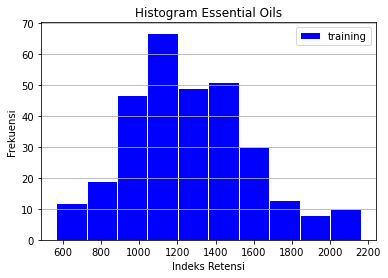

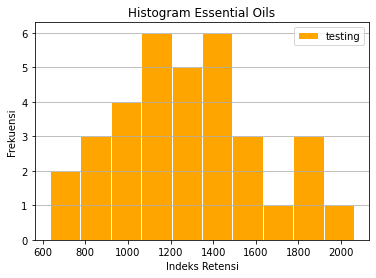

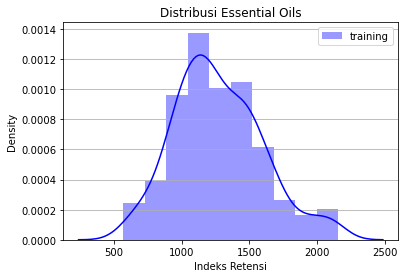

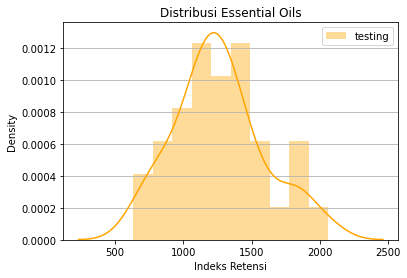

In [6]:
#membuat histogram
plt.hist(y_train, color='blue', edgecolor='white', bins=10, label='training')
plt.grid(axis='y')
plt.title("Histogram Essential Oils")
plt.xlabel("Indeks Retensi")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

plt.hist(y_test, color='orange', edgecolor='white', label='testing')
#menambahkan label
plt.grid(axis='y')
plt.title("Histogram Essential Oils")
plt.xlabel("Indeks Retensi")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

sns.distplot(y_train, bins=10, color='blue', label='training')
plt.legend()
plt.grid(axis='y')
plt.title("Distribusi Essential Oils")
plt.xlabel("Indeks Retensi")
plt.ylabel("Density")
plt.show()

sns.distplot(y_test, bins=10, color='orange', label='testing')
plt.legend()
plt.grid(axis='y')
plt.title("Distribusi Essential Oils")
plt.xlabel("Indeks Retensi")
plt.ylabel("Density")
plt.show()

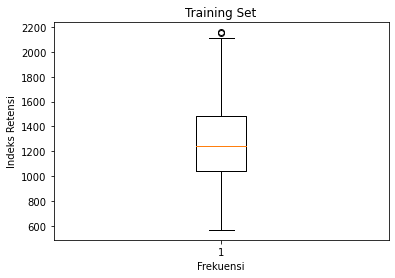

<function matplotlib.pyplot.show(close=None, block=None)>

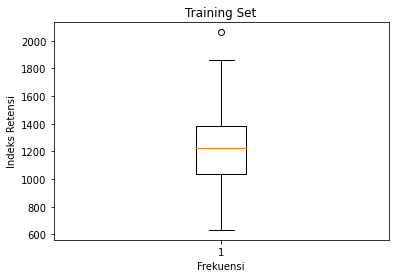

In [7]:
plt.boxplot(y_train,)
plt.title("Training Set")
plt.ylabel("Indeks Retensi")
plt.xlabel("Frekuensi")
plt.show()


plt.boxplot(y_test)
plt.title("Training Set")
plt.ylabel("Indeks Retensi")
plt.xlabel("Frekuensi")
plt.show

#### Membuat Model Regresi Linear Berganda

In [8]:
model = LinearRegression().fit(x_train,y_train)

#### Melakukan prediksi nilai Y dengan model Regresi Linear Berganda Yang Telah Dibuat

In [9]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#### Summary dari Model Regresi

In [10]:
r_sq = model.score(x_train,y_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print("MLR Summary  :")
print(' R-Square    :' , r_sq)
print(' RMSE        :', rmse)
print(' Intercept   :', model.intercept_)
print(' Slope       :', model.coef_)

MLR Summary  :
 R-Square    : 0.9696105620601809
 RMSE        : 56.55231813435949
 Intercept   : 1127.1474418421105
 Slope       : [-1159.67671956   -60.34744039   375.19717878   -17.05433755
  -654.9657395 ]


#### Save output ke CSV

In [11]:
prediction = pd.DataFrame(y_train_pred, columns=['predictions'])
observed = y_train.to_frame()

print(type(y_train))

haha = observed.join(prediction)

haha.to_csv("hasil_prediksi.csv")

<class 'pandas.core.series.Series'>


#### Membuat Visualisasi Model

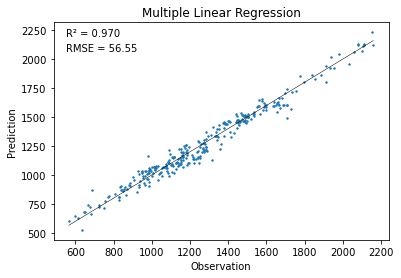

In [12]:
plt.scatter(y_train,y_train_pred, s=2)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k', lw=0.5)
plt.title('Multiple Linear Regression')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.text(550,2200,'R\u00b2 = 0.970')
plt.text(550,2070, 'RMSE = 56.55')
plt.show()